### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key='6cbca726c5a80908ade0f47c65ec52fe126c0be4')

<ipython-input-2-9a6048e380b6>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='6cbca726c5a80908ade0f47c65ec52fe126c0be4')


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-16 00:00:00+00:00,188.18,188.46,186.00,186.07,19183064,44.955956,45.022848,44.435157,44.451880,76732256,0.0,1.0
1,AAPL,2018-05-17 00:00:00+00:00,186.99,188.91,186.36,188.00,17294029,44.671667,45.130352,44.521160,44.912954,69176116,0.0,1.0
2,AAPL,2018-05-18 00:00:00+00:00,186.31,187.81,186.13,187.19,18297728,44.509215,44.867563,44.466214,44.719446,73190912,0.0,1.0
3,AAPL,2018-05-21 00:00:00+00:00,187.63,189.27,186.91,188.00,18400787,44.824562,45.216356,44.652555,44.912954,73603148,0.0,1.0
4,AAPL,2018-05-22 00:00:00+00:00,187.16,188.88,186.78,188.38,15240704,44.712279,45.123185,44.621498,45.003736,60962816,0.0,1.0


In [ ]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,189.317063,191.344458,187.019150,189.072592,6.481976e+07,104.810610,105.982423,103.518730,104.709519,1.109876e+08,0.007440,1.002385
std,69.665535,70.307904,68.680381,69.385404,4.025594e+07,46.070211,46.602344,45.483736,46.031747,5.447278e+07,0.067883,0.084583
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,34.207850,35.057091,34.162140,34.638485,3.519586e+07,0.000000,1.000000
25%,144.627500,146.435000,142.650550,144.030000,3.103320e+07,53.263130,53.760164,52.674262,53.224211,7.562469e+07,0.000000,1.000000
50%,167.350000,169.630000,165.780000,167.445000,5.925628e+07,118.448742,119.692040,116.840428,118.203818,9.586338e+07,0.000000,1.000000
75%,209.557500,211.997500,207.605000,209.870000,8.722652e+07,146.568496,147.798915,144.577962,146.339179,1.297685e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,180.433547,181.355492,177.568579,181.048177,4.268849e+08,0.820000,4.000000


In [ ]:
df.shape

(1258, 14)

In [ ]:
df1=df['close'] 

In [ ]:
df1

0       188.180
1       186.990
2       186.310
3       187.630
4       187.160
         ...   
1253    171.770
1254    173.555
1255    173.750
1256    172.570
1257    172.070
Name: close, Length: 1258, dtype: float64

Text(0, 0.5, 'Closing Price')

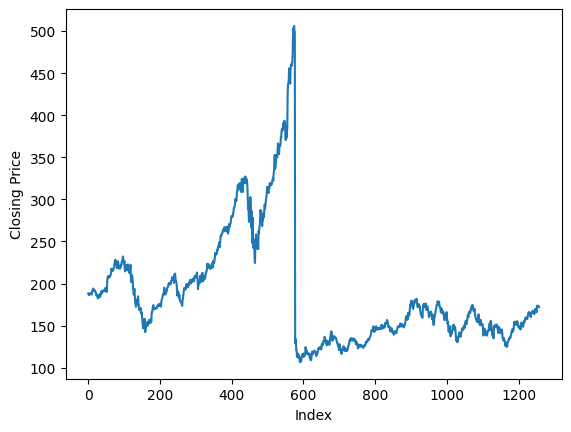

In [ ]:
plt.plot(df1)
plt.xlabel('Index')
plt.ylabel('Closing Price')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))  # (x-mean)/std
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # Meaning that you do not have to specify an exact number for one of the dimensions in the reshape method

In [ ]:
df1.shape

(1258, 1)

In [ ]:
# Splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
print(training_size)
print(test_size)

1006
252


In [ ]:
# Convert an array of values into a dataset matrix i.e time series data into supervised learning data
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step)]   # f1 f2 f3...fn		
		b=dataset[i + time_step]	# o/p
		dataX.append(a)
		dataY.append(b)
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Input in the form [samples, time steps, features] which is required for LSTM

In [ ]:
print(X_train.shape) 
print(y_train.shape)

(905, 100, 1)
(905, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(151, 100, 1)
(151, 1)


In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # It expects to know the shape of inputs
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=16,batch_size=64)

Epoch 1/16
15/15 [==============================] - 3s 178ms/step - loss: 0.0022 - val_loss: 1.5430e-04
Epoch 2/16
15/15 [==============================] - 4s 257ms/step - loss: 0.0028 - val_loss: 1.6449e-04
Epoch 3/16
15/15 [==============================] - 3s 172ms/step - loss: 0.0022 - val_loss: 3.5814e-04
Epoch 4/16
15/15 [==============================] - 3s 175ms/step - loss: 0.0020 - val_loss: 1.7714e-04
Epoch 5/16
15/15 [==============================] - 3s 179ms/step - loss: 0.0021 - val_loss: 2.7986e-04
Epoch 6/16
15/15 [==============================] - 3s 216ms/step - loss: 0.0019 - val_loss: 4.0589e-04
Epoch 7/16
15/15 [==============================] - 3s 204ms/step - loss: 0.0021 - val_loss: 1.7953e-04
Epoch 8/16
15/15 [==============================] - 3s 175ms/step - loss: 0.0015 - val_loss: 2.5179e-04
Epoch 9/16
15/15 [==============================] - 3s 174ms/step - loss: 0.0028 - val_loss: 2.3781e-04
Epoch 10/16
15/15 [==============================] - 3s 174ms/st

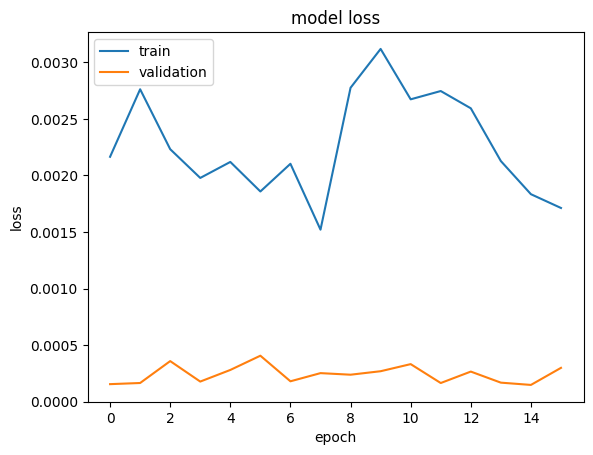

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 33ms/step


In [ ]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

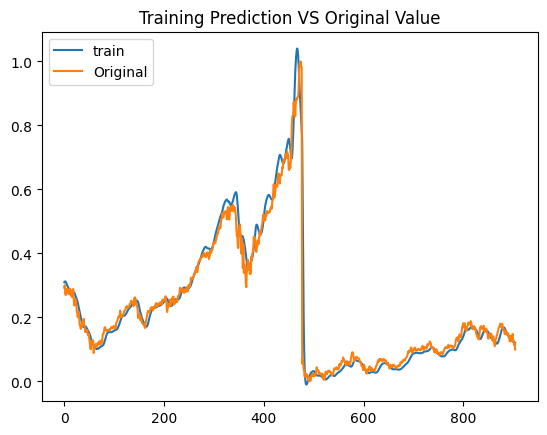

In [ ]:
plt.plot(train_predict)
plt.plot(y_train)
plt.title('Training Prediction VS Original Value')
plt.legend(['train', 'Original'], loc='upper left')
plt.show()

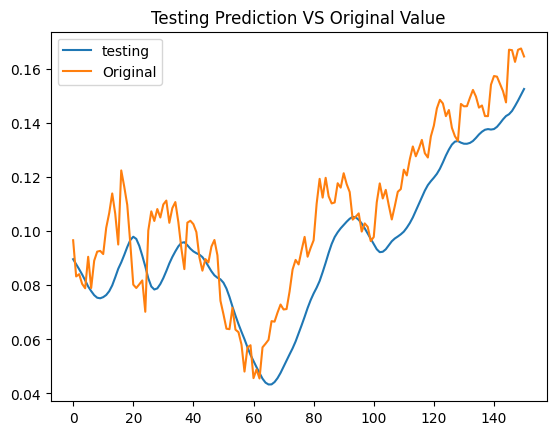

In [ ]:
plt.plot(test_predict)
plt.plot(y_test)
plt.title('Testing Prediction VS Original Value')
plt.legend(['testing', 'Original'], loc='upper left')
plt.show()

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
k=math.sqrt(mean_squared_error(y_train,train_predict))
print("Mean Squared Error between Predicted Trainig Values and Original Values is:%.5f" %k)

Mean Squared Error between Predicted Values and Original Values is:0.04286


In [ ]:
# Test Data RMSE
l=math.sqrt(mean_squared_error(y_test,test_predict))
print("Mean Squared Error between Predicted Test Values and Original Values is:%.5f" %l)

Mean Squared Error between Predicted Values and Original Values is:0.01728


In [ ]:
len(test_data)

252

In [ ]:
x_input=test_data[152:].reshape(1,-1) # Row is 1 and columns are unknown
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)  # Each input is in the form of list present in an array
temp_input=temp_input[0].tolist() # Converts the array into list

In [ ]:
temp_input

[0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.1028929242329

In [ ]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)  # Output after previous 100 days of input
        temp_input.extend(yhat[0].tolist()) # Output added to the input list
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

1 day input [0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.157

In [ ]:
len(df1)

1258

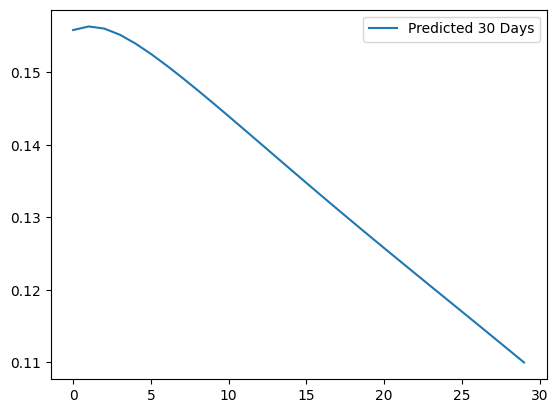

In [ ]:
plt.plot(lst_output,label='Predicted 30 Days')
plt.legend()

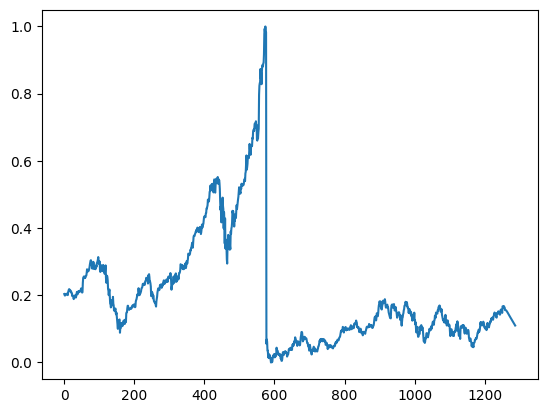

In [ ]:
# Complete Output
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)